# Project 2: Data Wrangling

## Loading Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import requests as req
%matplotlib inline
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

## Gathering Data

Loading the twitter archive data frame that was available for download on the\
Udacity project preparation page.

In [2]:
df_ta = pd.read_csv('twitter-archive-enhanced.csv')

Loading the image predictor data frame by using python's request library to\
programmatically download the file from a url that was provided on the udacity\
project overview page.

In [3]:
with req.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv') as rq:
    with open('image_predictions.tsv', 'wb') as file:
        file.write(rq.content)

In [4]:
# Checking to see if we succesfullly collected the file using the url provided
# on the project walkthrough page.
rq.status_code

200

In [5]:
df_ip = pd.read_csv('image_predictions.tsv', sep='\t')

Getting additional Twitter data using twitter's API.

In [ ]:
# Code for querying Twitter's API for each tweet in the Twitter archive and saving the 
# received JSON in a text file.
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [6]:
df_ad = pd.read_json('tweets.json', lines=True)

## Description of the gathered data-frames.

### The Twitter Archive Data-Frame.

This data frame holds data about tweets that were posted by the [@dog_rates](https://twitter.com/dog_rates) twitter user. It has multiple columns that describe in-depthly, the charactristics of posted tweets. The rows are lised below.

#### Twitter Archive Columns Description:
- **tweet_id:** This column contains the unique identification of tweets.
- **in_reply_to_status_id:** 
- **in_reply_to_user_id:**
- **timestamp:** This column gives the time and date a tweet was posted.
- **source:** This column shows the medium through which the tweet was made.
- **text:** This column shows the caption that accompanies tweets.
- **retweeted_status_id:** This column displays the unique identification of a retweet.
- **retweeted_status_user_id:** This column shows off the user id of users who retweeted original tweets.
- **retweeted_status_timestamp:** This column reveals the exact time and day a retweet was posted.
- **expanded_urls:** This column contains the links to tweets.
- **rating_numerator:** This column contains the numerator of dog ratings given by the [@dog_rates](https://twitter.com/dog_rates) twitter user.
- **rating_denominator:** This column displays the denominator of dog ratings given by the [@dog_rates](https://twitter.com/dog_rates) twitter user.
- **name:** This column reveals the names of dogs present in the tweets.
- **doggo:** This column shows if specific dogs qualify to be named the dog slang,doggo. A doggo is a dog that's a big pupper.
- **floofer:** This column shows if specific dogs qualify to be named the dog slang, floofer. A floofer is a dog that has seemingly excessive fur.
- **pupper:** This column shows if specific dogs qualify to be named the dog slang, pupper. A pupper is a dog that is a small doggo.
- **puppo:** This column shows if specific dogs qualify to be named the dog slang, puppo. A puppo is a dog which is in it's transitional phase between  pupper and doggo.

### The Image Predictor Data-Frame.

This data-frame contains data about the pictures of dogs that are accompanied with the texts that are posted as tweets on the [@dog_rates](https://twitter.com/dog_rates) twitter page. The columns that are present in this data-frame are described below.

#### Image Predictor Columns Description:
- **tweet_id:** This column contains the unique identification of tweets.
- **jpg_url:** This column holds the links to pictures of specified dogs in the tweets posted by the user of the [@dog_rates](https://twitter.com/dog_rates) page.
- **img_num:** This column shows the position of the displayed posted picture out of a possible number of four, as allowed by twitter.
- **p1:** This column contains the algorithm's number one prediction for the image in the tweet.
- **p1_conf:** This column shows how confident the algorithm is in its first prediction.
- **p1_dog:** This column reveals if the algorithm's predominant prediction is indeed that of a dog.
- **p2:** This column shows off the algorithm's second most likely prediction.
- **p2_conf:** This column displays how confident the algorithm is in it's second prediction.
- **p2_dog:** This column reveals if the algorithm's second prediction is a dog.
- **p3:** This column shows off the algorithm's third most likely prediction.
- **p3_conf:** This column displays how confident the algorithm is in it's third prediction.
- **p3_dog:** This column reveals if the algorithm's third prediction is a dog.

### The Additional Data-Frame.
As the name implies, this data-frame contains additional information about the chatacteristics of the tweets posted on the  [@dog_rates](https://twitter.com/dog_rates) twitter page. It is more detailed than the Twitter Archive Data-Frame and also more bulky, as it was gathered directly from Twitter's database through Twitter's API. The columns in this data-frame are described below.

#### Additional Data Data-Frame Columns Description:
- **created_at:** This column contains the time stamp for when the tweets were posted.
- **id:** This column displays the specific identification number of tweets.
- **full_text:** This column reveals the captions that accompany posted tweets.
- **truncated:** This column shows whether the text from the original tweet was truncated.
- **display_text_range:** This column shows the length of tweet captions.
- **entities:** This column displays additional meta data that was included in tweets.
- **extended_entities:** This column holds media objects that were included in tweets.
- **source:** This column shows the medium through which tweets were posted.
- **in_reply_to_status_id:** This column contains the integer representation of the original Tweet’s ID, if the represented tweet is a reply.
- **in_reply_to_status_id_str:** This column contains the string representation of the original Tweet's ID.
- **in_reply_to_user_id:** This column contains the integer representation of the original Tweet’s ID, if the represented tweet is a reply.
- **in_reply_to_user_id_str:** This column contains the string representation of the original Tweet's ID.
- **in_reply_to_screen_name:** This column contains the screen name of the original Tweet’s author, if the represented tweet is a reply.
- **user:** This column shows the person that posted a tweet.
- **geo:** This column should hold the geographical location of tweets, but it's an empty column.
- **coordinates:** This column should hold the coordinates of the location tweets, but it's an empty column.
- **place:** This column indicates that the tweet is associated, but not necessarily originating from a Place . 
- **contributors:** This column should display whether there are contributors associated with a tweet, but it's an empty column.
- **is_quote_status:** This column shows whether a tweet has been quoted or not.
- **retweet_count:** This column holds the retweet count of original tweets.
- **favorite_count:** This column holds the favorite count for original tweets.
- **favorited:** This column shows whether a tweet was favorited or not
- **retweeted:** This column reveals whether a tweet was retweeted ot not.
- **possibly_sensitive:** This column confirms if a tweet either has disturbing contents or not.
- **possibly_sensitive_appealable:** This column confirms if the disturbing contents warning of a tweet can be ignored.
- **lang:** This column shows the language a tweet was  written in.
- **retweeted_status:** This column shows if the tweet is a retweet or not.
- **quoted_status_id:** This column shows the specific identification of quoted tweets.
- **quoted_status_id_str:** This column gives the string of the specified quoted status id.
- **quoted_status:** This column confirms if a given tweet is a quote tweet.

## Assessing Data

In [7]:
# displaying the twitter archive data frame.
df_ta

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [8]:
print(df_ta.loc[1]['source'])
print(df_ta.loc[100]['source'])

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>


In [9]:
print(df_ta.loc[2]['text'])

This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB


- The text and source columns have quality issues. The text column has additional contents, namely tweet links and dog ratings, that aren't necessarily needed. The source column on the other hand has it's relevant details embedded in html tags.

In [10]:
# Using the sample function to visually assess random rows.
df_ta.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1347,704364645503647744,NaN,NaN,2016-02-29 17:56:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Bisquick. He's a Beneplop Cumbers...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704364645...,12,10,Bisquick,None,None,None,None
480,815736392542261248,NaN,NaN,2017-01-02 01:48:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Akumi. It's his birthday. He received ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/815736392...,11,10,Akumi,None,None,None,None
365,829011960981237760,NaN,NaN,2017-02-07 17:00:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Dexter. He was reunited with his mom y...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/829011960...,13,10,Dexter,None,None,None,None
658,791672322847637504,NaN,NaN,2016-10-27 16:06:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When she says you're a good boy and you know y...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/791672322...,13,10,None,None,None,None,None
1693,681297372102656000,NaN,NaN,2015-12-28 02:15:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is actually a lion. We only rate dogs. Fo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/681297372...,12,10,actually,None,None,None,None
2194,668892474547511297,NaN,NaN,2015-11-23 20:42:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ruffles. He is an Albanian Shoop Da Wh...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668892474...,11,10,Ruffles,None,None,None,None
412,822975315408461824,NaN,NaN,2017-01-22 01:12:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Albus. He's soaked as h*ck. Seems to h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/822975315...,12,10,Albus,None,None,None,None
1870,675149409102012420,NaN,NaN,2015-12-11 03:05:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",holy shit 12/10 https://t.co/p6O8X93bTQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675149409...,12,10,None,None,None,None,None
1462,694905863685980160,NaN,NaN,2016-02-03 15:30:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He's a Bisquick Taj Mapaw. Too...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/694905863...,10,10,Archie,None,None,None,None
1664,682788441537560576,NaN,NaN,2016-01-01 05:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy New Year from your fav holiday squad! 🎉 ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682788441...,12,10,None,None,None,pupper,None


In [11]:
df_ta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

- The Twitter Archive Data-Frame has incorrect data types for the tweet_id and timestamp columns

In [12]:
# Looking through the missing values in the expanded_url column.
df_ta[df_ta.expanded_urls.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [13]:
print(df_ta.loc[40, 'text'])

This is Kevin. He's just so happy. 13/10 what is your secret Kevin https://t.co/1r4MFCbCX5


Apparently, the texts of the tweets with ids that fall within this group of null values in the expanded_url columns, don't have tweet links present at the end of their texts, as shown in their respective text columns.

In [14]:
df_ta.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


From the above cell, it is seen that rows in the rating_denominator column have values that are less than ten and a particular row has a zero value. Since it is mathematically impossible to have zero as a denominator, I'd look for the exact row with the zero value, and also the other rows with denominators less than ten, to check for further details.

In [15]:
df_ta[df_ta.rating_denominator < 10 ]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None


In [16]:
print(df_ta.loc[516, 'text'])

Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx


In [17]:
print(df_ta.loc[2335, 'text'])

This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv


In [18]:
print(df_ta.loc[313, 'text'])

@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho


In [19]:
df_ta[df_ta.rating_denominator == 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [20]:
df_ta.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

- The rating numerator and denominator ratings for the rows with row ids 313 and 2335 are incorrect.

In [21]:
mask = df_ta.name.str.contains('a^[a-z]', regex=True)

In [22]:
# Showing off the image predictor data frame.
df_ip

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [23]:
df_ip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [24]:
# Revealing the additional data data frame 
df_ad

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,111,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2350,2015-11-16 00:04:52+00:00,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,311,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2351,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,128,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2352,2015-11-15 23:05:30+00:00,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,132,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


- The id column is not consistent with the column names in the other data-frames.

In [25]:
df_ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

### Quality Issues.

 #### Twitter Archive Data-Frame:
- The values in the source column are embedded in html tags.
- The doggo, floofer, pupper and puppo columns have empty values represented as none instead of nan
- The name column has invalid name values and it consists of empty values that are represented as none instead of nan. 
- The text column contains the ratings of dogs and links to the tweet at the end of 2297 cells.
- The cell with index number 313 has an invalid rating numerator of 960 and rating deominator of 0, which should be 13 and 10 respectively.
- The timestamp column has an incorrect data type. It should be a datetime data type and not an a string.
- The cell with index number 2335 has an invalid rating numerator of 1 and rating deominator of 2, which should be 9 and 10 respectively.
- The tweet_id column data type should be a string and not an integer.
- The rating numerator and denominator columns should be floats and not integers.
- The in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp columns are not needed.
- The created-at, id, retweet_count and favorite_count columns are the only needed columns in the twitter additional data dataframe.

#### Image Predictor Data-Frame:
- The breed of some dogs in the p1, p2 and p3 columns are seperated with underscores instead of spaces
- The breed of some dogs in the p1, p2 and p3 start with uppercase letters.
- The img_num column is not needed.

#### Additional Twitter Data Data-Frame:
- The id column doesn't match the column name of tweet_id for both the twitter archive and image predictor dataframes.

### Tidiness Issues

#### Twitter Archive Data-Frame:
- The doggo, floofer, pupper and puppo columns are not meant to be seperate  columns.
- All the data-frames should be merged together.

## Cleaning

Making copies of the dataframes.

In [26]:
df_ta_clean = df_ta.copy()
df_ip_clean = df_ip.copy()
df_ad_clean = df_ad.copy()

### Define

1. Drop the in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp columns from the Twitter Archive Data-Frame.
2. Drop the img_num from the Image Predictor Data-Frame.
3. Only the tweet_id, retweet_count, and favorite_count columns are needed in the Additional Data Data-Frame.

In [27]:
# Defining a function for dropping columns in a data-frame.
def drop_columns(df, columns):
    df.drop(columns, axis=1, inplace=True)

In [28]:
# Dropping unneeded columns in the Twitter Archive Data-Frame.
columns = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']
drop_columns(df_ta_clean, columns)

In [29]:
# Dropping the img_num column in the Image-Predictor Data-Frame
drop_columns(df_ip_clean, 'img_num')

In [30]:
# Programatically displaying the columns in the Additional Twitter Data-Frame
# so as to copy and paste the unneeded columns into the defined function.
print(df_ad_clean.columns)

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status'],
      dtype='object')


In [31]:
# Dropping unneeded columns in the Additional Twitter Data Data-Frame.
columns = ['created_at', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status']
drop_columns(df_ad_clean, columns)

### Test

In [32]:
print(df_ta_clean.columns)

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')


In [33]:
print(df_ip_clean.columns)

Index(['tweet_id', 'jpg_url', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')


In [34]:
print(df_ad_clean.columns)

Index(['id', 'retweet_count', 'favorite_count'], dtype='object')


### Define
4. Rename the id column to tweet_id in the Additional Data Data-Frame.

### Code

In [35]:
# Reanming the id column of the additional twitter data to tweet_id
df_ad_clean.rename(columns={'id' :'tweet_id'}, inplace=True)

### Test

In [36]:
print(df_ad_clean.columns)

Index(['tweet_id', 'retweet_count', 'favorite_count'], dtype='object')


### Define
5. Correct the incorrect Rating numerator and denominator values for column id 313
6. Correct the incorrect Rating numerator and denominator values for column id 2335

### Code

In [37]:
# Displaying the current value of this specific cell in this row.
df_ta_clean.at[313,'rating_numerator']

960

In [38]:
# Displaying the current value of this specific cell in this row.
df_ta_clean.at[313,'rating_denominator']

0

In [39]:
# Displaying the current value of this specific cell in this row.
df_ta_clean.at[2335,'rating_numerator']

1

In [40]:
# Displaying the current value of this specific cell in this row.
df_ta_clean.at[2335,'rating_denominator']

2

In [41]:
# Correcting the value
df_ta_clean.at[313,'rating_numerator']=13

In [42]:
# Correcting the value
df_ta_clean.at[313,'rating_denominator']=10

In [43]:
# Correcting the value
df_ta_clean.at[2335,'rating_numerator'] = 9

In [44]:
# Correcting the value
df_ta_clean.at[2335,'rating_denominator'] = 10

### Test

In [45]:
df_ta_clean.at[313,'rating_numerator']

13

In [46]:
df_ta_clean.at[313,'rating_denominator']

10

In [47]:
df_ta_clean.at[2335,'rating_numerator']

9

In [48]:
df_ta_clean.at[2335,'rating_denominator']

10

In [49]:
# Merging the Twitter Archive Data-Frame and the Image prediction Data-Frame.
# After, which the Additional Data Data-Frame will be merged to it.
df_almost_there = pd.merge(df_ta_clean, df_ip_clean, on='tweet_id', how='left')

In [50]:
df_almost_there.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,...,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,...,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,...,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,...,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,...,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [51]:
# Merging the last data-frame with the previoulsy merged one. After which
# further cleaning of the merged data-frame will continue.
df_merge = pd.merge(df_almost_there, df_ad_clean, on='tweet_id', how='left')

In [52]:
df_merge.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853.0,39467.0
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514.0,33819.0
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328.0,25461.0
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964.0,42908.0
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774.0,41048.0


In [53]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2356 non-null   int64  
 1   timestamp           2356 non-null   object 
 2   source              2356 non-null   object 
 3   text                2356 non-null   object 
 4   expanded_urls       2297 non-null   object 
 5   rating_numerator    2356 non-null   int64  
 6   rating_denominator  2356 non-null   int64  
 7   name                2356 non-null   object 
 8   doggo               2356 non-null   object 
 9   floofer             2356 non-null   object 
 10  pupper              2356 non-null   object 
 11  puppo               2356 non-null   object 
 12  jpg_url             2075 non-null   object 
 13  p1                  2075 non-null   object 
 14  p1_conf             2075 non-null   float64
 15  p1_dog              2075 non-null   object 
 16  p2    

In [54]:
df_merge.describe()

,tweet_id,rating_numerator,rating_denominator,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count
count,2.356000e+03,2356.000000,2356.000000,2075.000000,2.075000e+03,2.075000e+03,2354.000000,2354.000000
mean,7.427716e+17,12.727929,10.463073,0.594548,1.345886e-01,6.032417e-02,3164.797366,8080.968564
std,6.856705e+16,41.517993,6.739552,0.271174,1.006657e-01,5.090593e-02,5284.770364,11814.771334
min,6.660209e+17,0.000000,7.000000,0.044333,1.011300e-08,1.740170e-10,0.000000,0.000000
25%,6.783989e+17,10.000000,10.000000,0.364412,5.388625e-02,1.622240e-02,624.500000,1415.000000
50%,7.196279e+17,11.000000,10.000000,0.588230,1.181810e-01,4.944380e-02,1473.500000,3603.500000
75%,7.993373e+17,12.000000,10.000000,0.843855,1.955655e-01,9.180755e-02,3652.000000,10122.250000
max,8.924206e+17,1776.000000,170.000000,1.000000,4.880140e-01,2.734190e-01,79515.000000,132810.000000


### Define
7. Replace the none values with NaN in the doggo, floofer, puppo and pupper columns.

### Code

In [55]:
# Defining a function for replacing none values in given columns with NaN. 
def rep_none(df_col):
    df_col.replace('None', np.nan, inplace=True)

In [56]:
rep_none(df_merge.doggo)
rep_none(df_merge.floofer)
rep_none(df_merge.pupper)
rep_none(df_merge.puppo)

### Test

In [57]:
df_merge.doggo.value_counts()

doggo    97
Name: doggo, dtype: int64

In [58]:
df_merge.floofer.value_counts()

floofer    10
Name: floofer, dtype: int64

In [59]:
df_merge.pupper.value_counts()

pupper    257
Name: pupper, dtype: int64

In [60]:
df_merge.puppo.value_counts()

puppo    30
Name: puppo, dtype: int64

### Define
8. Correct the invalid values, and replace the None values with NaN in the name column.

In [61]:
# Checking for the values in the column.
df_merge.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [62]:
# Displaying the unique contents of the name column and iterating to check for 
# invalid values.
df_merge.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [63]:
# Displaying the rows that have the value 'the' in their names column
df_merge[df_merge.name == 'the']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
1527,690360449368465409,2016-01-22 02:28:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Stop sending in lobsters. This is the final wa...,https://twitter.com/dog_rates/status/690360449...,9,10,the,NaN,NaN,...,0.686933,True,French_bulldog,0.076359,True,Brabancon_griffon,0.035007,True,1006.0,2925.0
1603,685943807276412928,2016-01-09 21:58:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is the newly formed pupper a capella grou...,https://twitter.com/dog_rates/status/685943807...,8,10,the,NaN,NaN,...,0.200812,True,toy_terrier,0.114512,True,Cardigan,0.094520,True,696.0,1801.0
1797,677269281705472000,2015-12-16 23:29:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is the happiest pupper I've ever seen. 10...,https://twitter.com/dog_rates/status/677269281...,10,10,the,NaN,NaN,...,0.656616,True,collie,0.195405,True,German_shepherd,0.013103,True,790.0,2164.0
1815,676613908052996102,2015-12-15 04:05:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is the saddest/sweetest/best picture I've...,https://twitter.com/dog_rates/status/676613908...,12,10,the,NaN,NaN,...,0.493790,False,Doberman,0.096423,True,miniature_pinscher,0.070647,True,219.0,1183.0
2037,671561002136281088,2015-12-01 05:26:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is the best thing I've ever seen so sprea...,https://twitter.com/dog_rates/status/671561002...,13,10,the,NaN,NaN,...,0.469373,True,black-and-tan_coonhound,0.270893,True,Rottweiler,0.153233,True,7931.0,13679.0
2212,668587383441514497,2015-11-23 00:30:28 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Never forget this vine. You will not stop watc...,https://vine.co/v/ea0OwvPTx9l,13,10,the,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1174.0,1760.0
2345,666063827256086533,2015-11-16 01:22:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is the happiest dog you will ever see. Ve...,https://twitter.com/dog_rates/status/666063827...,10,10,the,NaN,NaN,...,0.775930,True,Tibetan_mastiff,0.093718,True,Labrador_retriever,0.072427,True,232.0,496.0
2346,666058600524156928,2015-11-16 01:01:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is the Rand Paul of retrievers folks! He'...,https://twitter.com/dog_rates/status/666058600...,8,10,the,NaN,NaN,...,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True,61.0,115.0


In [64]:
# Displaying the rows that have the value 'such' in their names column
df_merge[df_merge.name == 'such']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
22,887517139158093824,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,https://twitter.com/dog_rates/status/887517139...,14,10,such,NaN,NaN,...,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False,12082.0,46959.0


In [65]:
# Displaying the rows that have the value 'a' in their names column
df_merge[df_merge.name == 'a']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
56,881536004380872706,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,https://twitter.com/dog_rates/status/881536004...,14,10,a,NaN,NaN,...,0.281463,True,Angora,0.272066,False,Persian_cat,0.114854,False,16570.0,50199.0
649,792913359805018113,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,https://twitter.com/dog_rates/status/792913359...,13,10,a,NaN,NaN,...,0.226716,False,lighter,0.081941,False,switch,0.039009,False,4715.0,16063.0
801,772581559778025472,2016-09-04 23:46:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys this is getting so out of hand. We only r...,https://twitter.com/dog_rates/status/772581559...,10,10,a,NaN,NaN,...,0.574345,True,Border_collie,0.128352,True,Saint_Bernard,0.059476,True,1968.0,7192.0
1002,747885874273214464,2016-06-28 20:14:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a mighty rare blue-tailed hammer sherk...,https://twitter.com/dog_rates/status/747885874...,8,10,a,NaN,NaN,...,0.408450,True,Samoyed,0.141330,True,pug,0.083018,True,1116.0,3243.0
1004,747816857231626240,2016-06-28 15:40:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Viewer discretion is advised. This is a terrib...,https://twitter.com/dog_rates/status/747816857...,4,10,a,NaN,NaN,...,0.768923,True,Chihuahua,0.029053,True,Shetland_sheepdog,0.029035,True,1316.0,5346.0
1017,746872823977771008,2016-06-26 01:08:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a carrot. We only rate dogs. Please on...,https://twitter.com/dog_rates/status/746872823...,11,10,a,NaN,NaN,...,0.540201,True,beagle,0.207835,True,Italian_greyhound,0.043565,True,2429.0,6593.0
1049,743222593470234624,2016-06-15 23:24:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a very rare Great Alaskan Bush Pupper....,https://twitter.com/dog_rates/status/743222593...,12,10,a,NaN,NaN,...,0.350629,True,soft-coated_wheaten_terrier,0.182782,True,golden_retriever,0.087662,True,2164.0,6792.0
1193,717537687239008257,2016-04-06 02:21:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",People please. This is a Deadly Mediterranean ...,https://twitter.com/dog_rates/status/717537687...,11,10,a,NaN,NaN,...,0.779356,True,Labrador_retriever,0.052511,True,kuvasz,0.049811,True,2069.0,6281.0
1207,715733265223708672,2016-04-01 02:51:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a taco. We only rate dogs. Please only...,https://twitter.com/dog_rates/status/715733265...,10,10,a,NaN,NaN,...,0.740229,True,miniature_poodle,0.081915,True,toy_poodle,0.063748,True,1920.0,5093.0
1340,704859558691414016,2016-03-02 02:43:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a heartbreaking scene of an incredible...,https://twitter.com/dog_rates/status/704859558...,10,10,a,NaN,NaN,...,0.284428,True,teddy,0.156339,False,mitten,0.138915,False,612.0,2462.0


In [66]:
# displaying the text of a tweet that has a valid name value in it's name 
# column
print(df_merge.loc[10, 'text'])

This is Koda. He is a South Australian deckshark. Deceptively deadly. Frighteningly majestic. 13/10 would risk a petting #BarkWeek https://t.co/dVPW0B0Mme


In [67]:
# displaying the text of a tweet that has an invalid name value 'the' in it's 
# name column
print(df_merge.loc[1527, 'text'])

Stop sending in lobsters. This is the final warning. We only rate dogs. Thank you... 9/10 https://t.co/B9ZXXKJYNx


In [68]:
# displaying the text of a tweet that has an invalid name value 'such' in it's 
# name column
print(df_merge.loc[22, 'text'])

I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba


In [69]:
# displaying the text of a tweet that has an invalid name value 'a' in it's 
# name column
print(df_merge.loc[56, 'text'])

Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af 
(IG: puffie_the_chow) https://t.co/ghXBIIeQZF


The code used to extract the names of dogs from the text of tweets did not work well for tweets that had the letter 'a', the words 'the', 'such e.t.c, after the phrase 'This is'. Following normal convention, that is names of other dogs in this column, the names of dogs actually came after the phrase 'This is'.

In [70]:
# Defining a function to replace invalid values with NaN in the name column of
# the merged data-frame.
def repl_nan(values):
    for value in values:
        df_merge.name.replace(value, np.nan, inplace=True)

In [71]:
values = ['his', 'incredibly', 'infuriating', 'just', 'actually', 'all',
         'an', 'by', 'not', 'my', 'mad', 'life', 'light', 'A', 'a', 'the', 'such',
         'getting']

In [72]:
repl_nan(values)

In [73]:
# Replacing the none values with NaN in the name column, using the earlier
# defined function
rep_none(df_merge.name)

### Test

In [74]:
# Displaying the rows that have the value 'a' in their names column
df_merge[df_merge.name == 'the']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count


In [75]:
# Displaying the rows that have the value 'a' in their names column
df_merge[df_merge.name == 'such']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count


In [76]:
# Displaying the rows that have the value 'a' in their names column
df_merge[df_merge.name == 'a']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count


In [77]:
df_merge[df_merge.name == 'just']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count


### Define
9. Convert the uppercase letters to lowercase and replacing underscores with spaces in the p1, p2, and p3 columns of the df_merge data-frame.

### Code

In [78]:
df_merge.p1

0                       orange
1                    Chihuahua
2                    Chihuahua
3                  paper_towel
4                       basset
                 ...          
2351        miniature_pinscher
2352       Rhodesian_ridgeback
2353           German_shepherd
2354                   redbone
2355    Welsh_springer_spaniel
Name: p1, Length: 2356, dtype: object

In [79]:
df_merge.p2

0                    bagel
1                 Pekinese
2                 malamute
3       Labrador_retriever
4         English_springer
               ...        
2351            Rottweiler
2352               redbone
2353              malinois
2354    miniature_pinscher
2355                collie
Name: p2, Length: 2356, dtype: object

In [80]:
df_merge.p3

0                            banana
1                          papillon
2                            kelpie
3                           spatula
4       German_short-haired_pointer
                   ...             
2351                       Doberman
2352             miniature_pinscher
2353                     bloodhound
2354            Rhodesian_ridgeback
2355              Shetland_sheepdog
Name: p3, Length: 2356, dtype: object

In [81]:
df_merge.p1 = df_merge.p1.str.replace('_', ' ')
df_merge.p2 = df_merge.p2.str.replace('_', ' ')
df_merge.p3 = df_merge.p3.str.replace('_', ' ')

In [82]:
df_merge.p1 = df_merge.p1.str.lower()
df_merge.p2 = df_merge.p2.str.lower()
df_merge.p3 = df_merge.p3.str.lower()

### Test

In [83]:
df_merge.p1

0                       orange
1                    chihuahua
2                    chihuahua
3                  paper towel
4                       basset
                 ...          
2351        miniature pinscher
2352       rhodesian ridgeback
2353           german shepherd
2354                   redbone
2355    welsh springer spaniel
Name: p1, Length: 2356, dtype: object

In [84]:
df_merge.p2

0                    bagel
1                 pekinese
2                 malamute
3       labrador retriever
4         english springer
               ...        
2351            rottweiler
2352               redbone
2353              malinois
2354    miniature pinscher
2355                collie
Name: p2, Length: 2356, dtype: object

In [85]:
df_merge.p3

0                            banana
1                          papillon
2                            kelpie
3                           spatula
4       german short-haired pointer
                   ...             
2351                       doberman
2352             miniature pinscher
2353                     bloodhound
2354            rhodesian ridgeback
2355              shetland sheepdog
Name: p3, Length: 2356, dtype: object

### Define
10. Extract the source of tweets from the html tags in the source column of the df_merge data-frame.

In [86]:
# Displaying the format of values in the source column of the df_merge 
# data-frame.
print(df_merge.loc[2352, 'source'])

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>


In [87]:
# Defining a function to extract the source of tweets from the source column
# that is embedded within html tags.
def extract_source(x):
    close_tag = x.find('>') +1
    open_tag = x[close_tag:].find('<')
    return x[close_tag:][:open_tag]

In [88]:
df_merge.source = df_merge.source.apply(lambda x: extract_source(x))

### Test

In [89]:
df_merge.source.unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene',
       'TweetDeck'], dtype=object)

### Define
11. Remove the extra information, links and ratings, from the text column

### Code`

In [90]:
# Displaying the format of values in the text column.
print(df_merge.loc[90,'text'])

Meet Cash. He hath acquired a stick. A very good stick tbh. 12/10 would pat head approvingly https://t.co/lZhtizkURD


In [91]:
df_merge.text = df_merge.text.str.extract('(.+(?=\s\d+/\d+\s))')

### Test

In [92]:
print(df_merge.loc[90,'text'])

Meet Cash. He hath acquired a stick. A very good stick tbh.


### Define
12. Change the data type of the tweet_id column from integer to string
13. Change the data type of the timestamp column from string to datetime64
14. Change the data type of the ratings numerator and denominator to float

### Code

In [93]:
print(df_merge.timestamp.dtypes)

object


In [94]:
print(df_merge.tweet_id.dtypes)

int64


In [95]:
print(df_merge.rating_numerator.dtypes)

int64


In [96]:
print(df_merge.rating_denominator.dtypes)

int64


In [97]:
# correcting the data type of the tweet_id column.
df_merge.tweet_id = df_merge.tweet_id.astype(str)

In [98]:
# correcting the data type of the timestamp column.
df_merge.timestamp = df_merge.timestamp.astype('datetime64[ns]')

In [99]:
# correcting the data type of the rating_numerator column.
df_merge.rating_numerator = df_merge.rating_numerator.astype(float)

In [100]:
# correcting the data type of the rating_denominator column.
df_merge.rating_denominator = df_merge.rating_denominator.astype(float)

### Test

In [101]:
print(df_merge.timestamp.dtypes)

datetime64[ns]


In [102]:
print(df_merge.tweet_id.dtypes)

object


In [103]:
print(df_merge.rating_numerator.dtypes)

float64


In [104]:
print(df_merge.rating_denominator.dtypes)

float64


### Define
15. Put the dog_slang columns into a single row.

### Code

In [106]:
slang_names = ['doggo', 'pupper', 'floofer', 'puppo']

In [107]:
# Joining the  selected columns into one column
df_merge['dog_slang'] = df_merge[slang_names].\
                        apply(lambda x: ','.join(x.dropna().astype(str)),axis=1)
# Replacing empty strings with NaN and changing the data type of our newly formed 
# column to categorical.
df_merge.dog_slang = df_merge.dog_slang.replace('', np.nan).astype('category')
# dropping the four columns
df_merge = df_merge.drop(columns=slang_names, axis=1)

### Test

In [108]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2356 non-null   object        
 1   timestamp           2356 non-null   datetime64[ns]
 2   source              2356 non-null   object        
 3   text                2234 non-null   object        
 4   expanded_urls       2297 non-null   object        
 5   rating_numerator    2356 non-null   float64       
 6   rating_denominator  2356 non-null   float64       
 7   name                1520 non-null   object        
 8   jpg_url             2075 non-null   object        
 9   p1                  2075 non-null   object        
 10  p1_conf             2075 non-null   float64       
 11  p1_dog              2075 non-null   object        
 12  p2                  2075 non-null   object        
 13  p2_conf             2075 non-null   float64     

In [109]:
df_merge.dog_slang.value_counts()

pupper           245
doggo             83
puppo             29
doggo,pupper      12
floofer            9
doggo,floofer      1
doggo,puppo        1
Name: dog_slang, dtype: int64

In [110]:
df_merge.sample(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,p1,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,dog_slang
20,888078434458587136,2017-07-20 16:49:33,Twitter for iPhone,This is Gerald. He was just told he didn't get...,https://twitter.com/dog_rates/status/888078434...,12.0,10.0,Gerald,https://pbs.twimg.com/media/DFMWn56WsAAkA7B.jpg,french bulldog,...,True,pug,9.319080e-04,True,bull mastiff,9.032110e-04,True,3653.0,22201.0,NaN
242,846153765933735936,2017-03-27 00:15:53,Twitter for iPhone,This is Vixen. He really likes bananas. Steals...,https://twitter.com/dog_rates/status/846153765...,13.0,10.0,Vixen,https://pbs.twimg.com/media/C74kWqoU8AEaf3v.jpg,giant schnauzer,...,True,flat-coated retriever,2.184510e-01,True,labrador retriever,1.080200e-01,True,10226.0,34394.0,NaN
1210,715680795826982913,2016-03-31 23:22:53,Twitter for iPhone,This is Zeus. He's downright fabulous.,https://twitter.com/dog_rates/status/715680795...,12.0,10.0,Zeus,https://pbs.twimg.com/media/Ce6b4MPWwAA22Xm.jpg,golden retriever,...,True,labrador retriever,2.228340e-03,True,chow,1.197150e-03,True,1813.0,4719.0,NaN
2248,667866724293877760,2015-11-21 00:46:50,Twitter for iPhone,This is Shaggy. He knows exactly how to solve ...,https://twitter.com/dog_rates/status/667866724...,10.0,10.0,Shaggy,https://pbs.twimg.com/media/CUS9PlUWwAANeAD.jpg,jigsaw puzzle,...,False,prayer rug,1.011300e-08,False,doormat,1.740170e-10,False,1110.0,3172.0,NaN
995,748346686624440324,2016-06-30 02:45:28,Twitter for iPhone,"""So... we meat again"" (I'm so sorry for that p...",https://twitter.com/dog_rates/status/748346686...,10.0,10.0,NaN,https://pbs.twimg.com/media/CmKpVtlWAAEnyHm.jpg,borzoi,...,True,whippet,2.314280e-01,True,saluki,5.826140e-02,True,1413.0,5735.0,NaN
1508,691483041324204033,2016-01-25 04:49:38,Twitter for iPhone,When bae says they can't go out but you see th...,https://twitter.com/dog_rates/status/691483041...,5.0,10.0,NaN,https://pbs.twimg.com/media/CZikKBIWYAA40Az.jpg,bloodhound,...,True,black-and-tan coonhound,7.741960e-02,True,gordon setter,9.826430e-03,True,656.0,2608.0,NaN
2206,668631377374486528,2015-11-23 03:25:17,Twitter for iPhone,Meet Zeek. He is a grey Cumulonimbus. Zeek is ...,https://twitter.com/dog_rates/status/668631377...,5.0,10.0,Zeek,https://pbs.twimg.com/media/CUd0sSvWsAA85wO.jpg,miniature schnauzer,...,True,australian terrier,2.252940e-02,True,silky terrier,1.524320e-02,True,349.0,763.0,NaN
2044,671533943490011136,2015-12-01 03:39:03,Twitter for iPhone,Super rare dog here. Spiffy mohawk. Sharp mout...,https://twitter.com/dog_rates/status/671533943...,6.0,10.0,NaN,https://pbs.twimg.com/media/CVHEju0XAAEUZRY.jpg,hen,...,False,cock,4.420330e-01,False,black swan,1.180750e-03,False,631.0,1092.0,NaN
545,805826884734976000,2016-12-05 17:31:15,Twitter for iPhone,This is Duke. He is not a fan of the pupporazzi.,https://twitter.com/dog_rates/status/805826884...,12.0,10.0,Duke,https://pbs.twimg.com/ext_tw_video_thumb/80582...,siberian husky,...,True,american staffordshire terrier,9.831330e-02,True,eskimo dog,8.018850e-02,True,2132.0,7335.0,NaN
645,793165685325201412,2016-10-31 19:00:10,Twitter for iPhone,This is Benji. He's Air Bud. It's a low effort...,https://twitter.com/dog_rates/status/793165685...,12.0,10.0,Benji,https://pbs.twimg.com/media/CwHj-jGWAAAnsny.jpg,golden retriever,...,True,labrador retriever,3.647660e-02,True,doormat,2.352850e-03,False,3238.0,10478.0,NaN


### Define
15. Drop the p2, p2_conf, p2_dog, p3, p3_conf and p3_dog columns

### Code

In [111]:
df = df_merge.copy()

In [112]:
list = ['p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog']

In [113]:
drop_columns(df, list)

### Test

In [114]:
df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'jpg_url', 'p1',
       'p1_conf', 'p1_dog', 'retweet_count', 'favorite_count', 'dog_slang'],
      dtype='object')

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2356 non-null   object        
 1   timestamp           2356 non-null   datetime64[ns]
 2   source              2356 non-null   object        
 3   text                2234 non-null   object        
 4   expanded_urls       2297 non-null   object        
 5   rating_numerator    2356 non-null   float64       
 6   rating_denominator  2356 non-null   float64       
 7   name                1520 non-null   object        
 8   jpg_url             2075 non-null   object        
 9   p1                  2075 non-null   object        
 10  p1_conf             2075 non-null   float64       
 11  p1_dog              2075 non-null   object        
 12  retweet_count       2354 non-null   float64       
 13  favorite_count      2354 non-null   float64     

In [116]:
# Replacing null values with the mean of the column.
df.retweet_count.fillna(df.retweet_count.mean(), inplace=True)

In [117]:
# Replacing null values with the mean of the column.
df.favorite_count.fillna(df.favorite_count.mean(), inplace=True)

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2356 non-null   object        
 1   timestamp           2356 non-null   datetime64[ns]
 2   source              2356 non-null   object        
 3   text                2234 non-null   object        
 4   expanded_urls       2297 non-null   object        
 5   rating_numerator    2356 non-null   float64       
 6   rating_denominator  2356 non-null   float64       
 7   name                1520 non-null   object        
 8   jpg_url             2075 non-null   object        
 9   p1                  2075 non-null   object        
 10  p1_conf             2075 non-null   float64       
 11  p1_dog              2075 non-null   object        
 12  retweet_count       2356 non-null   float64       
 13  favorite_count      2356 non-null   float64     

In [119]:
# saving the gathered, assessed and cleaned data-frame into a csv file
df.to_csv('twitter_archive_master_corrected.csv')

### Exploratory Data Analysis

> Procceding to analyze and check for trends in the cleaned df_merge data-frame.
> i've made a copy of the cleaned data-frame and named it 'df' for easy reference when performing operations.

> I will pose questions that will aid my analysis as i continue to explore the data.


In [120]:
df

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,p1,p1_conf,p1_dog,retweet_count,favorite_count,dog_slang
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,8853.0,39467.0,NaN
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,chihuahua,0.323581,True,6514.0,33819.0,NaN
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,chihuahua,0.716012,True,4328.0,25461.0,NaN
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal.,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper towel,0.170278,False,8964.0,42908.0,NaN
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True,9774.0,41048.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5.0,10.0,NaN,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature pinscher,0.560311,True,41.0,111.0,NaN
2352,666044226329800704,2015-11-16 00:04:52,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6.0,10.0,NaN,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,rhodesian ridgeback,0.408143,True,147.0,311.0,NaN
2353,666033412701032449,2015-11-15 23:21:54,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9.0,10.0,NaN,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,german shepherd,0.596461,True,47.0,128.0,NaN
2354,666029285002620928,2015-11-15 23:05:30,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7.0,10.0,NaN,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826,True,48.0,132.0,NaN


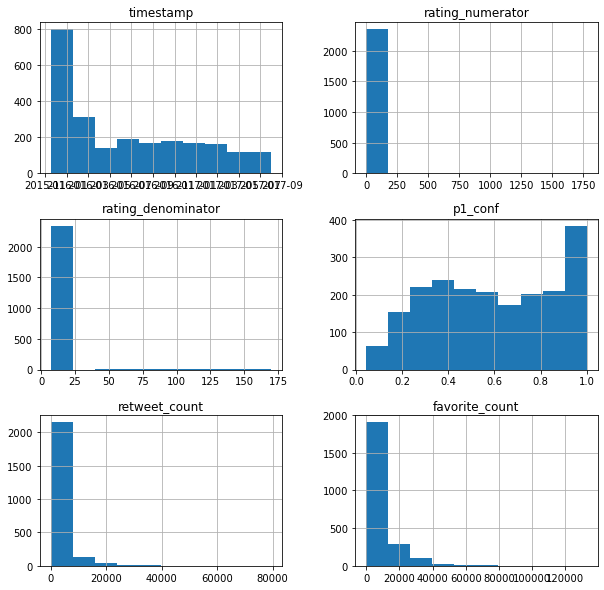

In [121]:
df.hist(figsize=(10,10));

In [122]:
df.describe()

,rating_numerator,rating_denominator,p1_conf,retweet_count,favorite_count
count,2356.000000,2356.000000,2075.000000,2356.000000,2356.000000
mean,12.727929,10.463073,0.594548,3164.797366,8080.968564
std,41.517993,6.739552,0.271174,5282.525823,11809.753380
min,0.000000,7.000000,0.044333,0.000000,0.000000
25%,10.000000,10.000000,0.364412,625.500000,1415.000000
50%,11.000000,10.000000,0.588230,1475.500000,3607.000000
75%,12.000000,10.000000,0.843855,3652.000000,10102.750000
max,1776.000000,170.000000,1.000000,79515.000000,132810.000000


### Question 1: How does the retweet count relate with the favorite count?

For this question, i will use a scatterplot and histogram to show the correlation between these two columns and also their distribution.

In [123]:
# defining a function for plotting scatterplots
def scatterplots(x_axis, y_axis):
    """function for plotting scatterplots"""
    plt.scatter(x_axis, y_axis);

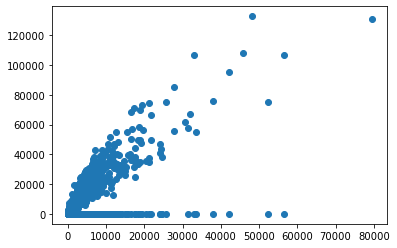

In [124]:
scatterplots(df.retweet_count, df.favorite_count)

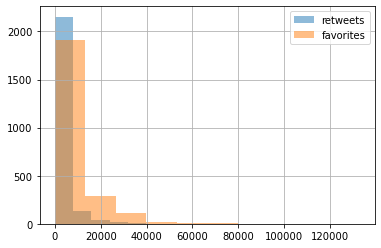

In [125]:
df.retweet_count.hist(alpha=0.5, label='retweets')
df.favorite_count.hist(alpha=0.5, label='favorites')
plt.legend();

When introducing these visualizations to aid my explanation to the question posed, i defined a function for plotting the scatterplot and i showed the distribution of the retweet and favorite counts on a single plot. I also reduced the transpareny of both histograms so as to clearly see the point of overlapping and also the correct extent of the distribution.

### Question 2: Which device is used mostly for interactions on the Twitter page in question

In [126]:
# Defining a function for plotting bar charts.
def plot_bar_charts(): 
    """"function for plotting bar charts"""
    heading = input('title of bar chart: ')
    x_title = input('label of the x_axis: ')
    y_title = input('label of the y_axis: ')
    plt.title(heading, fontsize=18)
    plt.xlabel(x_title, fontsize=18)
    plt.ylabel(y_title, fontsize=18)

title of bar chart: Most Used Source of Interaction
label of the x_axis: Sources of Interaction
label of the y_axis: Count


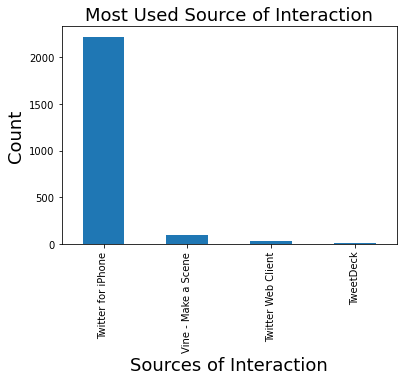

In [127]:
plot_bar_charts()
df.source.value_counts().plot(kind='bar');

For this question, I used a bar chart to visualize the most used device for posting tweets on the Twitter page in question.

### Question 3: What is the most popular slang name for dogs that are posted by the [@dog_rates](https://twitter.com/dog_rates)  user.

title of bar chart: Most Used Dog Slang Name
label of the x_axis: Dog Slang Name
label of the y_axis: Count


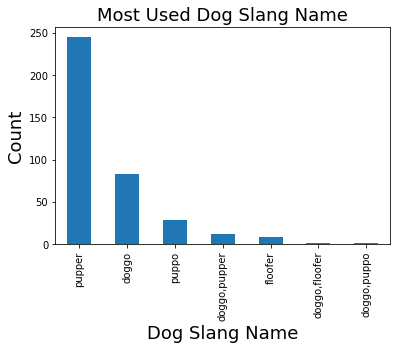

In [128]:
plot_bar_charts()
df.dog_slang.value_counts().plot(kind='bar');

The question posed required a categorical comparison to effectively show the most used dog slang name among the dog slang names used on the [@dog_rates](https://twitter.com/dog_rates) Twitter page

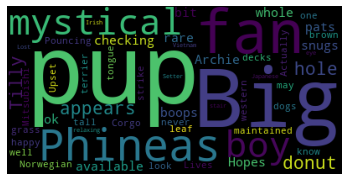

In [131]:
### Creating a wordcloud for the text column, to visualize and describe the 
# essence of the tweets of the @dog_rates twitter page.
text = df['text'].values 
wordcloud = WordCloud().generate(str(text))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Conclusion

> For the questions posed, I applied analytical thinking with the aid of visualizations to answer the questions sufficiently.

> For the first question, **How does the retweet count relate with the favorite count?**, I used a scatterplot and histogram to answer this question. The scatterplot showed that there is a positive correlation between the retweet and favorite counts. Therefore, it is clear from the scatterplot that tweet retweets increases as favorite counts increases. And from the histogram, it is clear that the count of favorites is greater than that of retweets.

> For the second question, ** Which device is used mostly for interactions on the Twitter page in question**, it is clear from the bar-chart that most interactions about dogs is done on twitter using an iphone.

> For the third question, **What is the most popular slang name for dogs that are posted by the @dog_rates user.** A bar chart is also used to categorize and show the frequency of the dog slang names used by this user, and it is very clear that pupper is the most frequently used dog slang. This also signifies that there are more puppers than any other dog types, that have been posted by the [@dog_rates](https://twitter.com/dog_rates) user.

> When working on this project i faced multiple issues that slowed down my pace and also served as blockades of progress. Firstly, I wasn't granted authorization for using twitter's API after days of applying. Although I couldn't apply my API collection skills on this project, I practiced using my acquired skills on the wikimedia API. I had issues reading the json file into my local notebook, but i read a documentation online for rectifying this issue. And finally, due to inability of this workspace to display the entirety of the data frames being used in this analysis, some columns were collapsed and certain contents weren’t accessible visually, while using the info function. I had to opt to using the loc function to see individual column values to have an idea of the way data was organized in the affected columns and assess if these contents had any issues that needed cleaning.